In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.io.ascii as a

from math import pi

import astropy.io.fits
import astropy.table

import FormulasForGaia as F

In [ ]:
def convertTGASfile(filename):
    """
        This function will:
        read in a TGAS FITS file and only use the data from stars whose parallax error is
        less than 20%.
        Create demonstraation plots.
        Save all the plots
        Save a text file containing X,Y,Z positions and absolute magnitudes
        
        Arguments:
            Filename = TGAS file
        Returns:
            4 plots: x vs y position, x vs z position, y vs z position and RA vs Dec
            (without the stars with a parallax with an error greater than 20%)
        Saves:
            Same 4 plots returned and a text file that contains X,Y,Z positions and absolute magnitudes for each star.
      """
    #Read the file into a table
    hdu = astropy.io.fits.open(filename)
    table = astropy.table.Table(hdu[1].data)

    #Create a statement to get rid of stars with parallax error larger than 20% or with negative distances
    fraction = np.abs(table['parallax_error']/table['parallax'])
    ok1 = fraction < 0.2
    ok2 = table['parallax']>0
    ok = ok1*ok2
    
    #From the table, extract parallax and other useful info, take only those rows for which [ok] is true
    Parallax= table['parallax'].data[ok] #.data takes only the numbers, getting rid of the tittle of the column
    Dec = (table['dec'].data[ok])*(pi/180) #changing to radians
    RA = (table['ra'].data[ok])*(pi/180)
    Fluxes= table['phot_g_mean_flux'].data[ok]
    Magnitudes = table['phot_g_mean_mag'].data[ok]
    
    #Use formulas to produce more useful arrays
    Distances = F.ParallaxToDistance(Parallax)
    X,Y,Z= F.toXYZ(RA,Dec,Distances)
    
    temp = filename.replace('.fits','.png')
    tempList = temp.split('_')
    label = tempList[-1]
    
    #Make demosntration Plots    
    plt.figure(figsize=(9,9))
    plt.scatter(X,Y,s = Fluxes/1000000,alpha=0.1)
    plt.xlim(np.min(X),np.max(X))
    plt.ylim(np.min(Y),np.max(Y))
    plt.xlabel('X Coordinates')
    plt.ylabel('y coordinates')  
    plt.title('X vs Y for {}'.format(filename))
    plt.savefig('XY_{}'.format(label))
    
    plt.figure(figsize=(9,9))
    plt.scatter(X,Z,s = Fluxes/1000000,alpha=0.1)
    plt.xlim(np.min(X),np.max(X))
    plt.ylim(np.min(Z),np.max(Z))
    plt.xlabel('X Coordinates')
    plt.ylabel('Z coordinates')  
    plt.title('X vs Z for {}'.format(filename))
    plt.savefig('XZ_{}'.format(label))
    
    plt.figure(figsize=(9,9))
    plt.scatter(Y,Z,s = Fluxes/1000000,alpha=0.1)
    plt.xlim(np.min(Y),np.max(Y))
    plt.ylim(np.min(Z),np.max(Z))
    plt.xlabel('Y Coordinates')
    plt.ylabel('Z coordinates')  
    plt.title('Y vs Z for {}'.format(filename))
    plt.savefig('YZ_{}'.format(label))
    
    plt.figure(figsize=(9,9))
    plt.subplot(111, projection="aitoff")
    plt.scatter(RA,Dec,color='aqua')
    plt.xlabel('Right Ascension')
    plt.ylabel('Declination')
    plt.grid(True)
    plt.title('RA and Dec for {}'.format(filename))
    plt.savefig('RADec_{}'.format(label))

 
    print('Creating new text file') 

#   name = input('Data from {}'.format(filename))+'.txt'  # Name of text file coerced with +.txt
#    file = open(name,'w') 
 #   for item in X:
#          print>>file, item
#    for item in Y:
#           print>>file, item
#    for item in Z:
#           print>>file, item
#    for item in Magnitudes:
#            print>>file, item
 #   file.close()
    
    return "Yay :)"

In [ ]:
convertTGASfile('data/TgasSource_000-000-000.fits')

In [ ]:
from glob import glob
filenames = glob('data/TgasSource_000-000-*.fits')
print filenames

Creating new text file
data/TgasSource_000-000-006.fits
Creating new text file
data/TgasSource_000-000-007.fits
Creating new text file
data/TgasSource_000-000-008.fits
Creating new text file
data/TgasSource_000-000-009.fits
Creating new text file
data/TgasSource_000-000-010.fits
Creating new text file
data/TgasSource_000-000-011.fits
Creating new text file
data/TgasSource_000-000-012.fits
Creating new text file
data/TgasSource_000-000-013.fits
Creating new text file
data/TgasSource_000-000-015.fits
Creating new text file


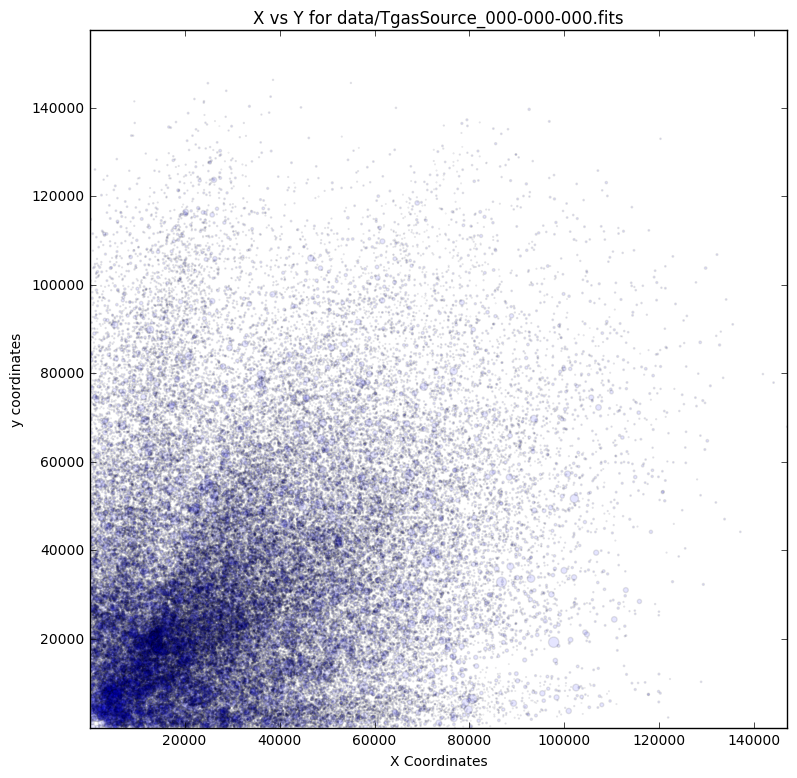

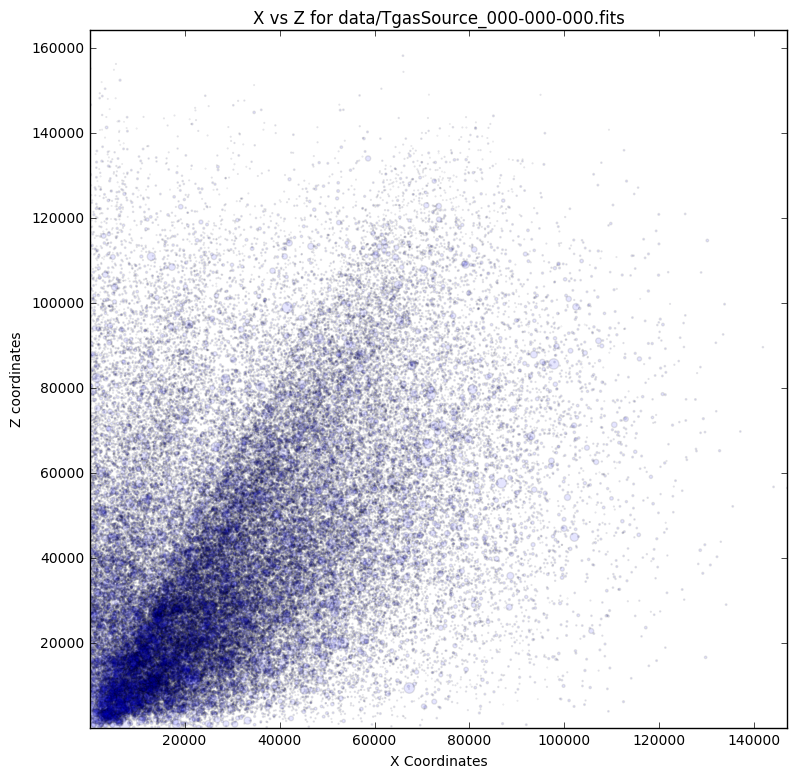

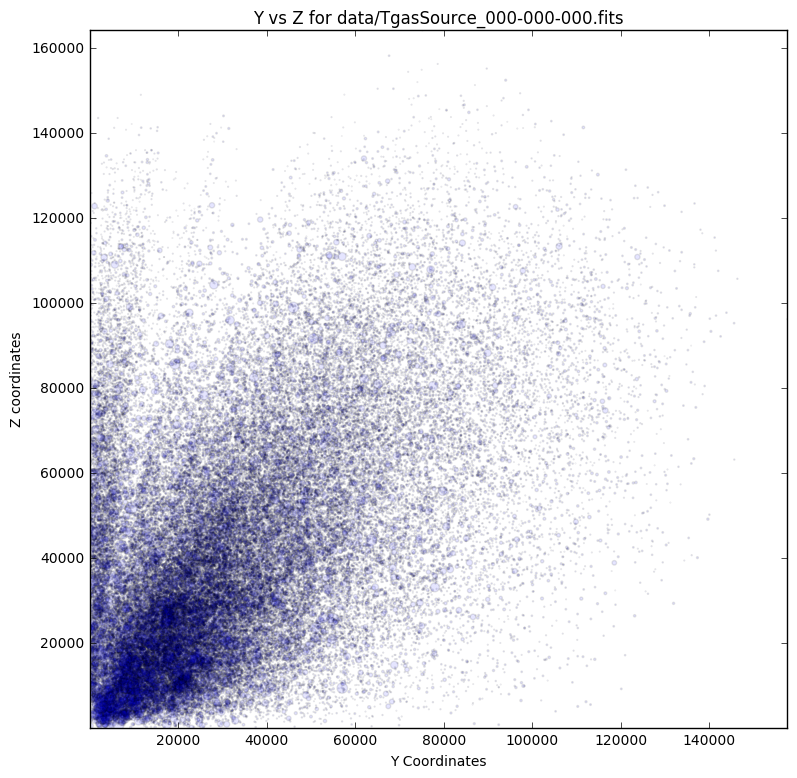

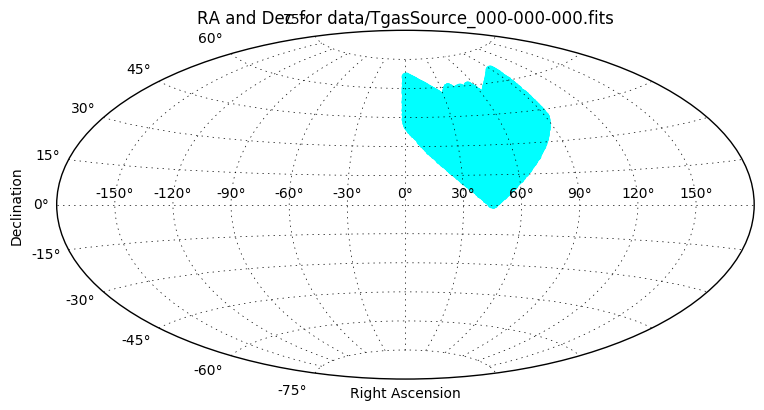

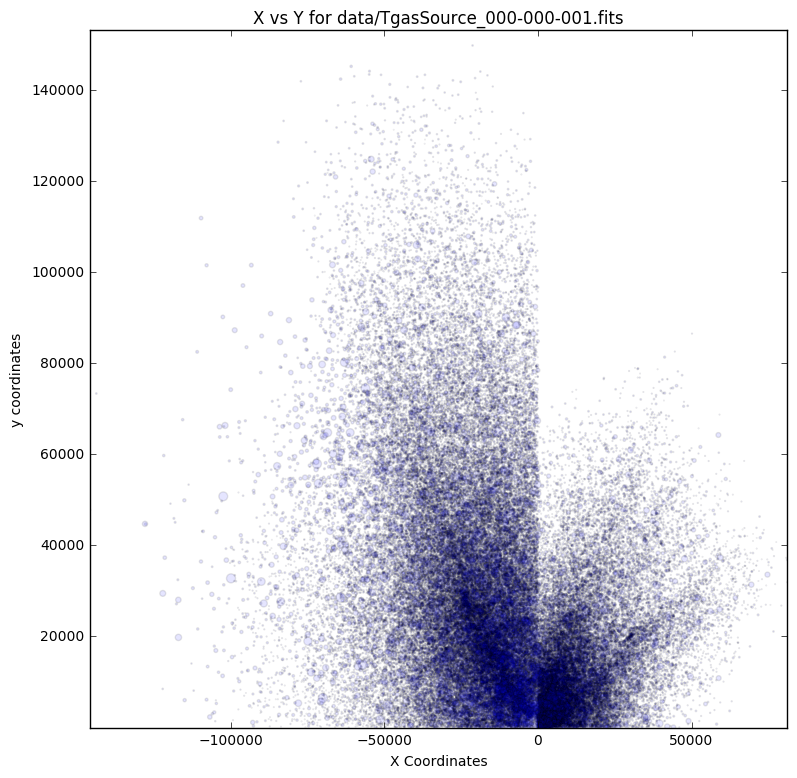

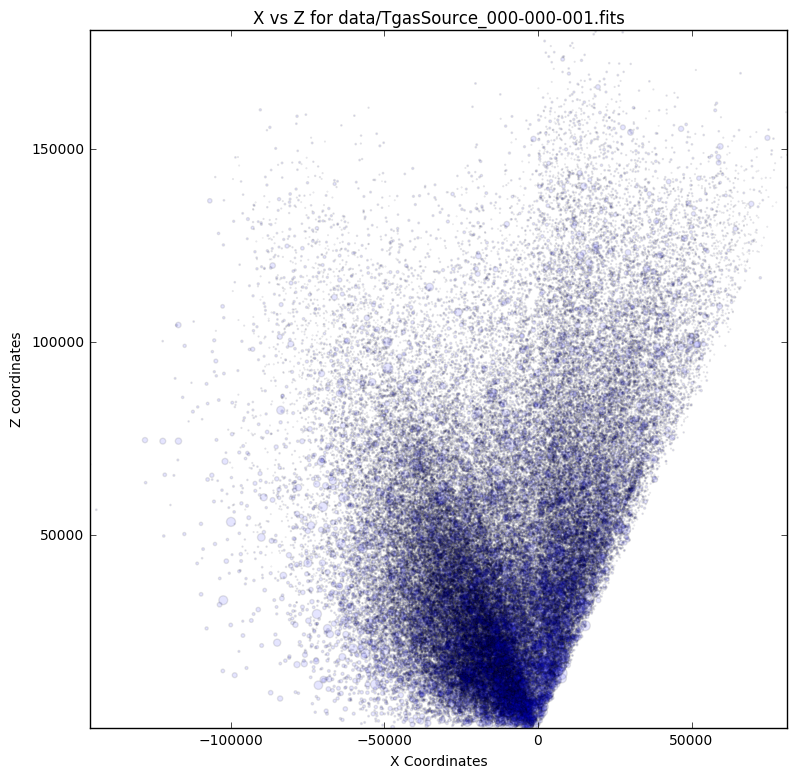

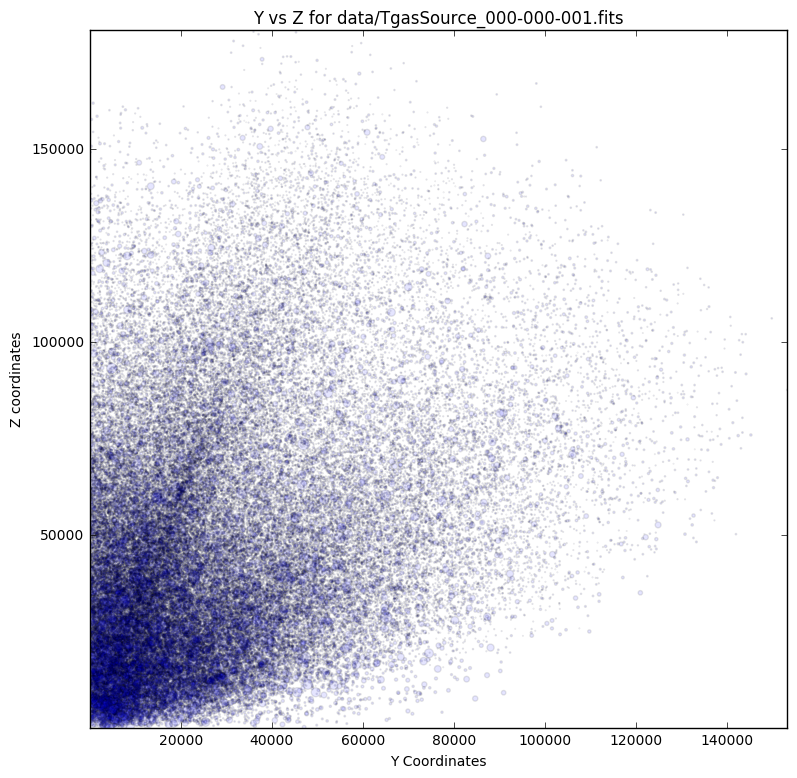

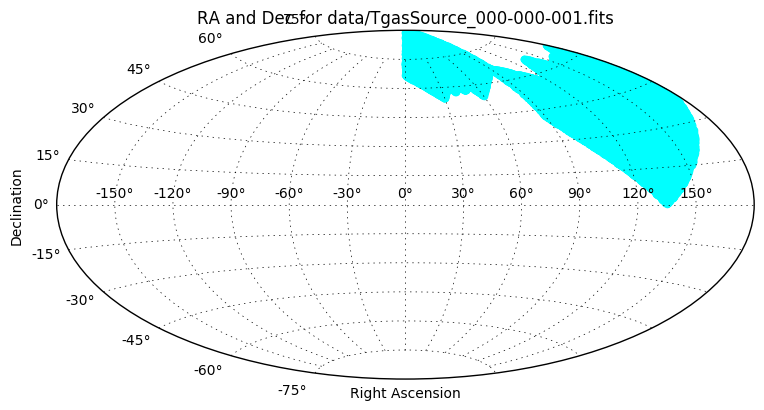

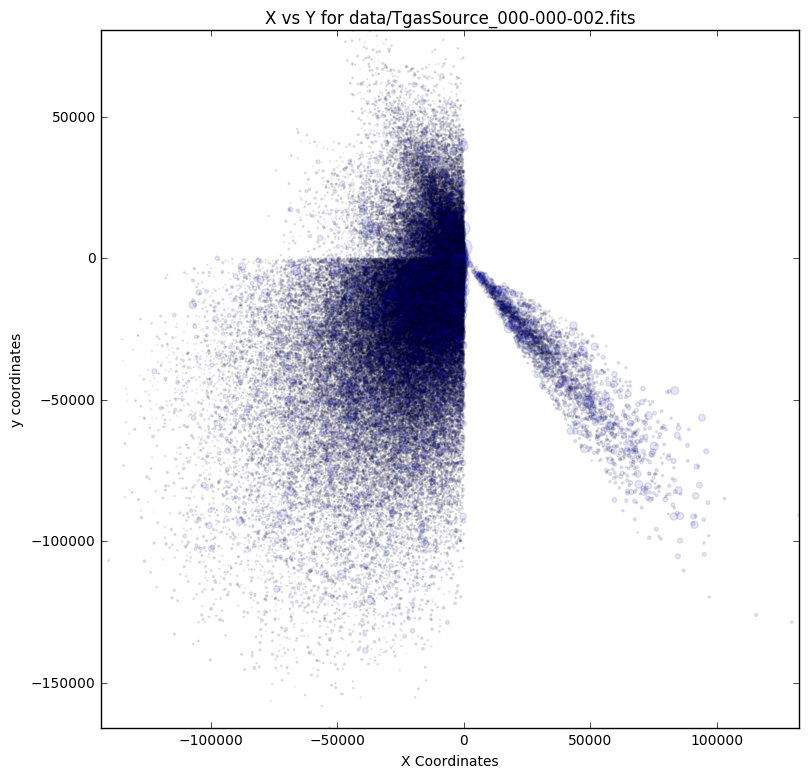

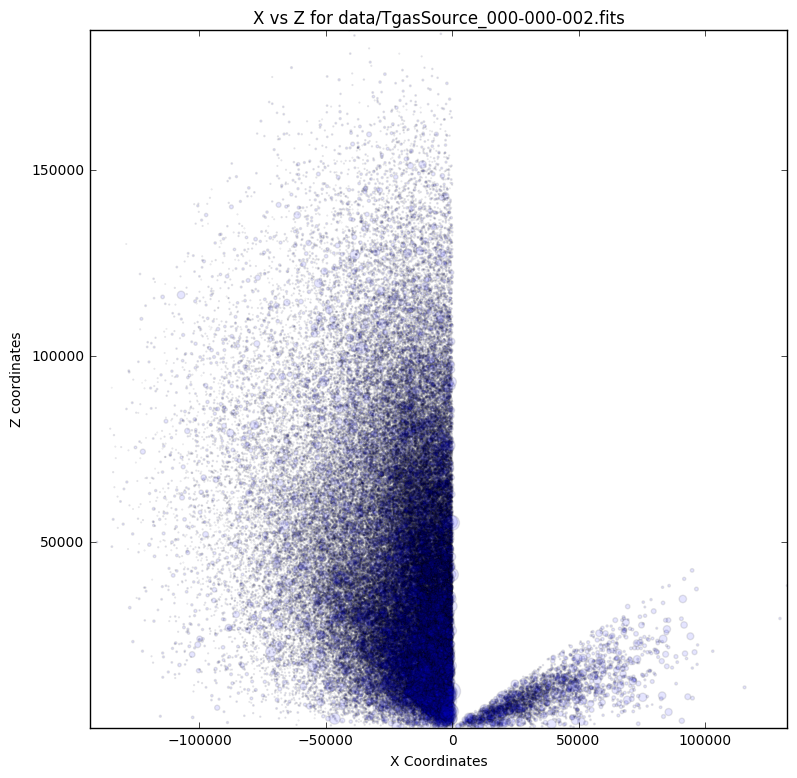

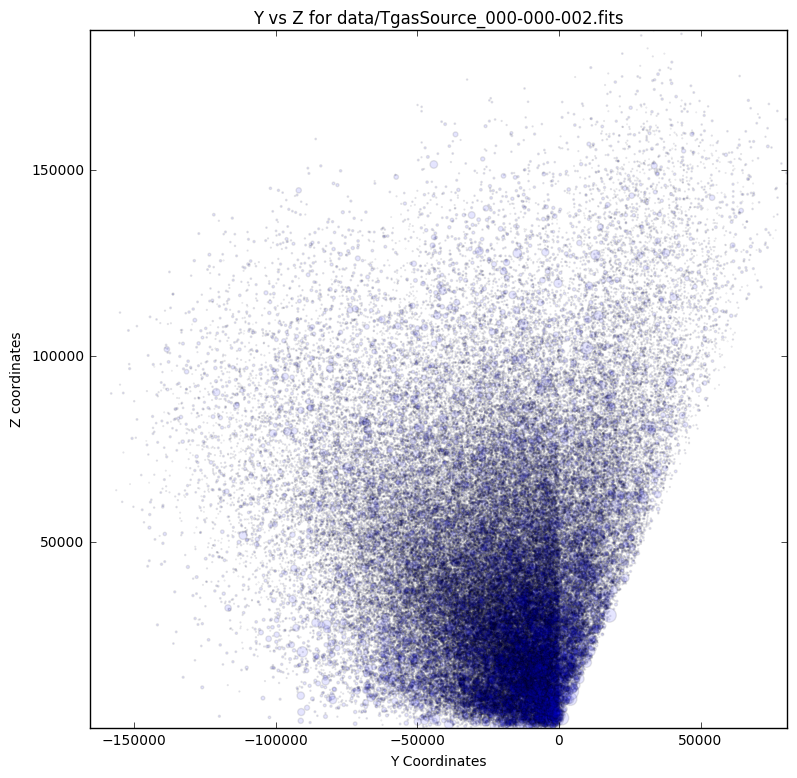

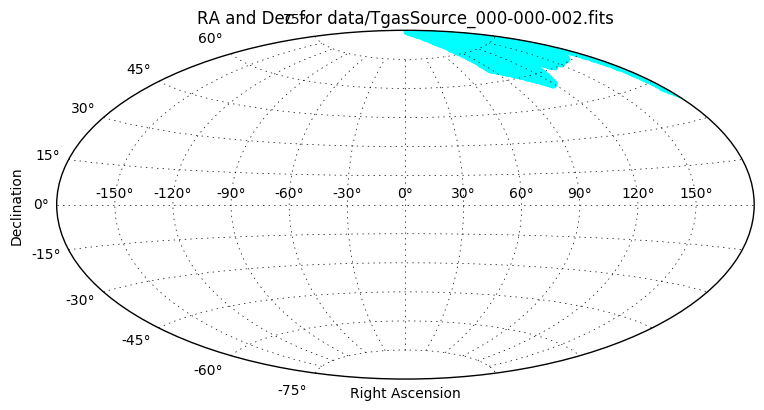

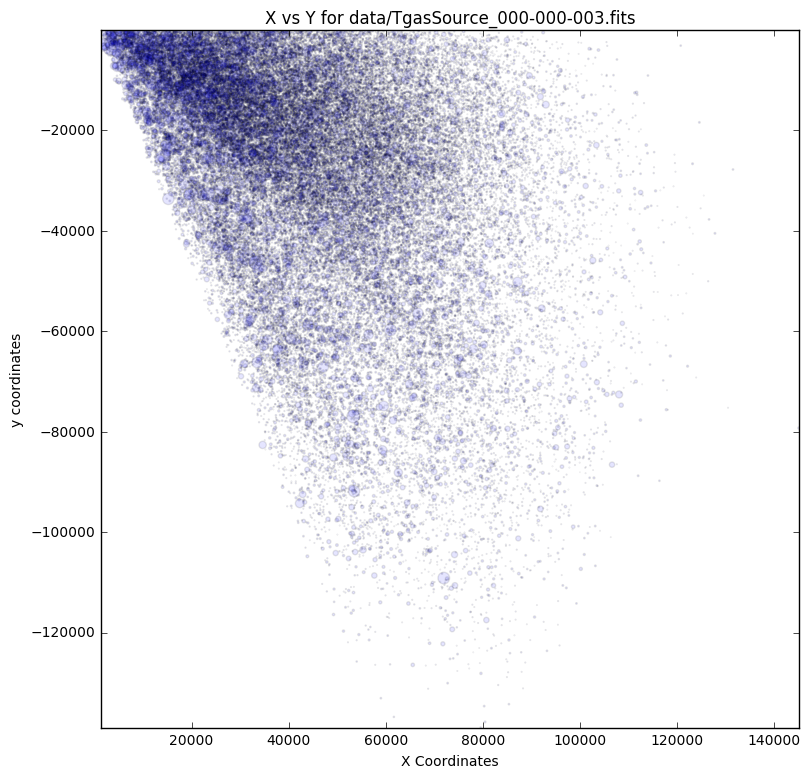

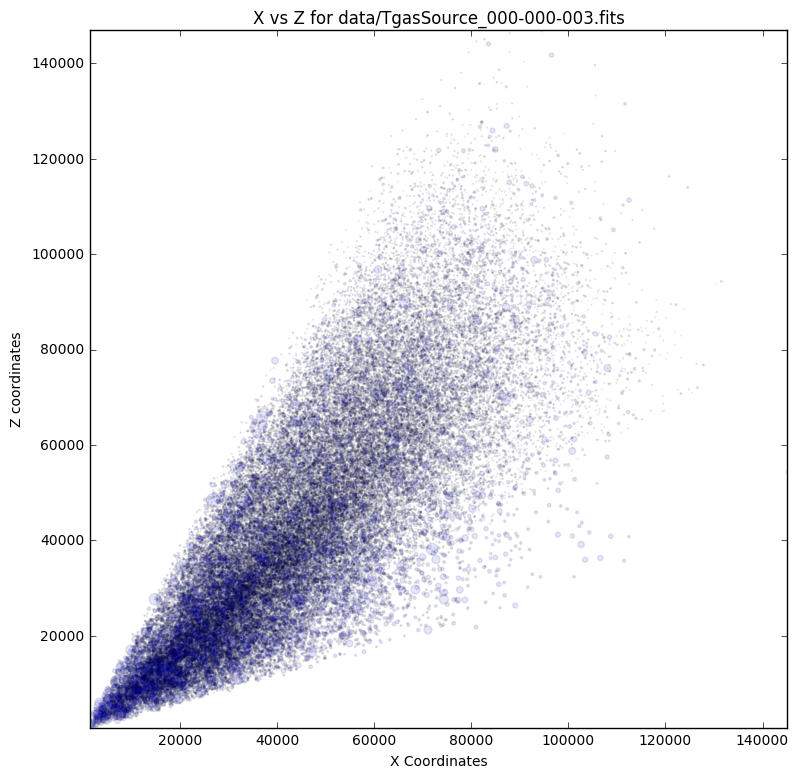

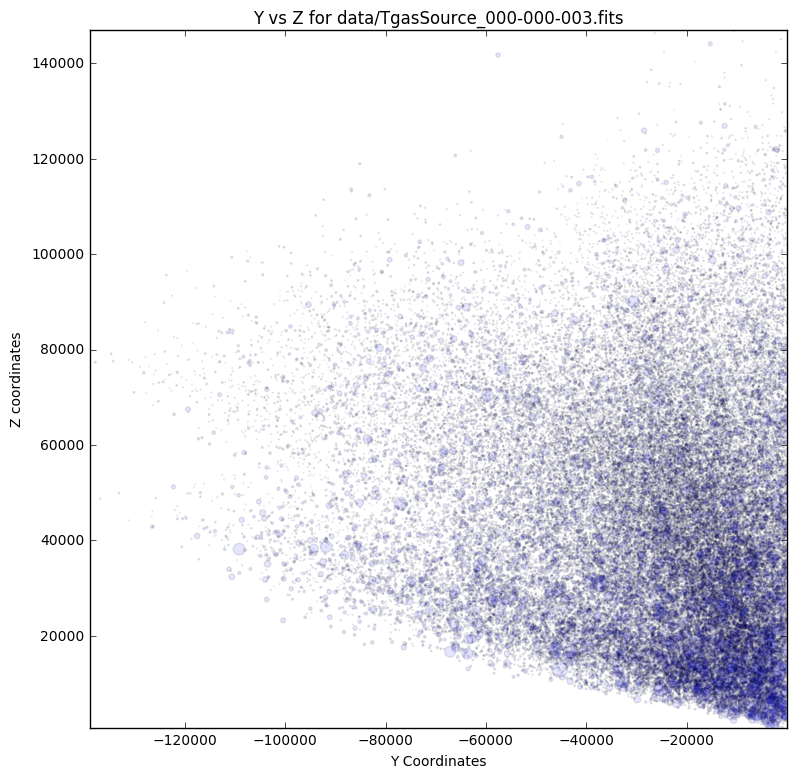

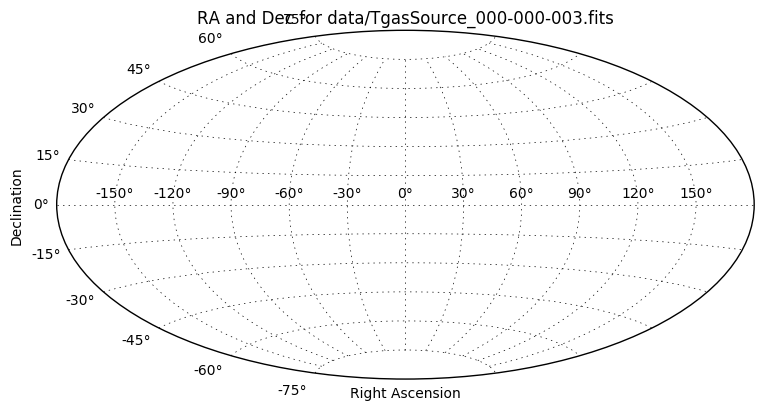

In [ ]:
for i in range(len(filenames)):
    print filenames[i]
    convertTGASfile(filenames[i])
    